In [1]:
import numpy as np
import cupy as cp
import cupyx.scipy.signal as signal
import scipy
from scipy.optimize import curve_fit
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

from astropy.modeling import models, fitting
import astropy.units as u
from astropy import constants as const
from astropy.stats import gaussian_sigma_to_fwhm,gaussian_fwhm_to_sigma

import datetime
import pickle
import importlib
import json
import time
import glob
from skimage.metrics import structural_similarity as ssim

from eve_ops.gaussian_fit_eve import gaussian_fit_eve
from eve_ops.data.eve_const import  wavelength_list_eve

from eve_ops.do_wavelet import do_wavelet

## Read EVE Daily

In [2]:
with open('D:\py_repo\EVE-spectrum-correction\Chapter4_v2\\basic_ops\eve_ops\data\daily_df.pkl', 'rb') as file:
    daily_df=pickle.load(file)
    
daily_df=daily_df[daily_df.index<pd.to_datetime('2014-05-25')]
daily_df    

,median_of_mean,median_of_stddev,median_of_amplitude,stddev_of_mean,stddev_of_stddev,stddev_of_amplitude,available_data
time,,,,,,,
2010-04-30,30.374138,0.028910,0.006518,0.000175,0.000076,0.000058,8570
2010-05-01,30.374133,0.028986,0.006556,0.000199,0.000070,0.000052,8579
2010-05-02,30.374000,0.029030,0.006503,0.000210,0.000070,0.000048,8579
2010-05-03,30.373922,0.029038,0.006513,0.000206,0.000102,0.000049,8640
2010-05-04,30.373876,0.029006,0.006656,0.000195,0.000092,0.000059,8578
...,...,...,...,...,...,...,...
2014-05-20,30.372114,0.031103,0.006697,0.000333,0.000145,0.000053,8583
2014-05-21,30.372141,0.031075,0.006630,0.000374,0.000141,0.000055,8581
2014-05-22,30.372299,0.030988,0.006609,0.000357,0.000127,0.000065,8582


In [3]:
daily_df.index[0]

Timestamp('2010-04-30 00:00:00')

In [4]:
pd.Timestamp('2011-10-05')

Timestamp('2011-10-05 00:00:00')

In [5]:
daily_df.loc[pd.to_datetime('2011-10-06')]

median_of_mean         NaN
median_of_stddev       NaN
median_of_amplitude    NaN
stddev_of_mean         NaN
stddev_of_stddev       NaN
stddev_of_amplitude    NaN
available_data         0.0
Name: 2011-10-06 00:00:00, dtype: float64

In [6]:
np.isnan(daily_df['median_of_mean'].values).sum()

18

Data variance =  8.668905964179229e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v2\basic_ops\eve_ops\do_wavelet.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


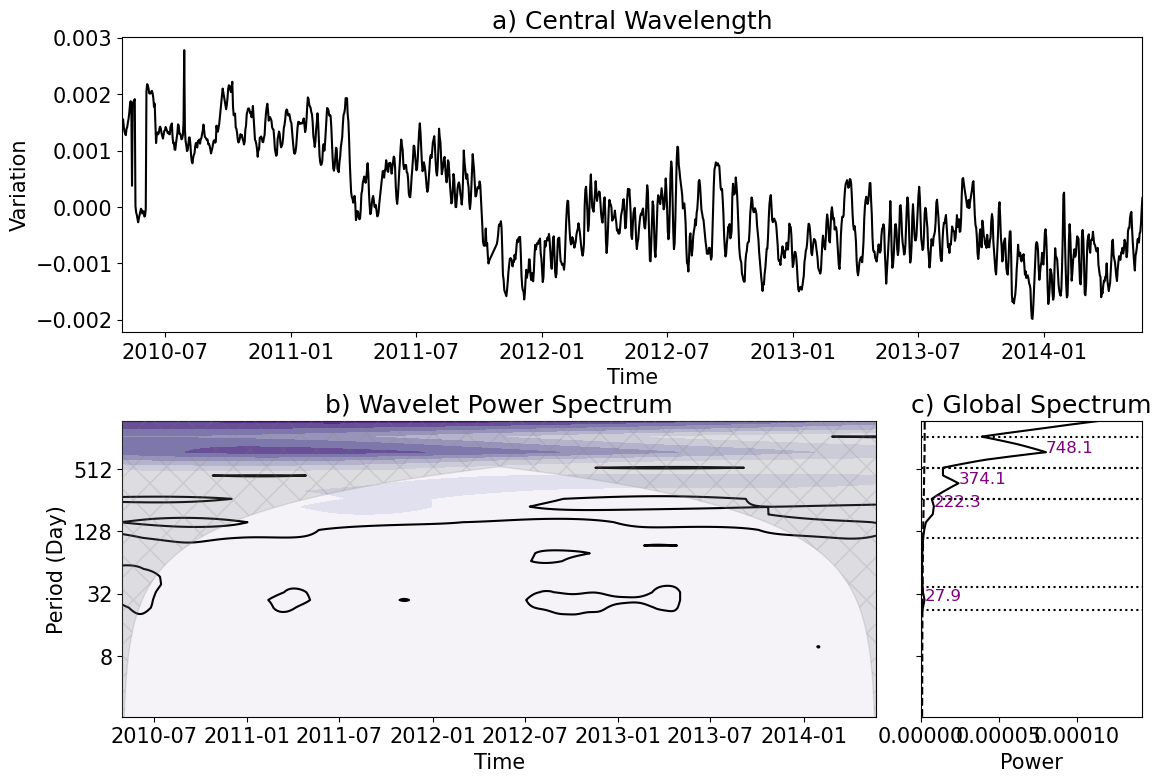

([27.86608729549853, 222.2660872954987, 374.06608729549885, 748.0660872954992],
 array([ 22.2660873, 109.6660873, 264.4660873, 528.8660873]),
 array([  37.2660873,  264.4660873,  528.8660873, 1057.8660873]))

In [10]:
do_wavelet(sst=daily_df['median_of_mean'].values,dt=1,
           show_peaks=True,
           time=daily_df.index,
           title='Central Wavelength',
           ylabel='Variation',
           fig_name='eve_ops\eve_fig\eps\wavelet\wavelet_central_wavelength.pdf',
           unit=None) 

Data variance =  1.6442873169674236e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v2\basic_ops\eve_ops\do_wavelet.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


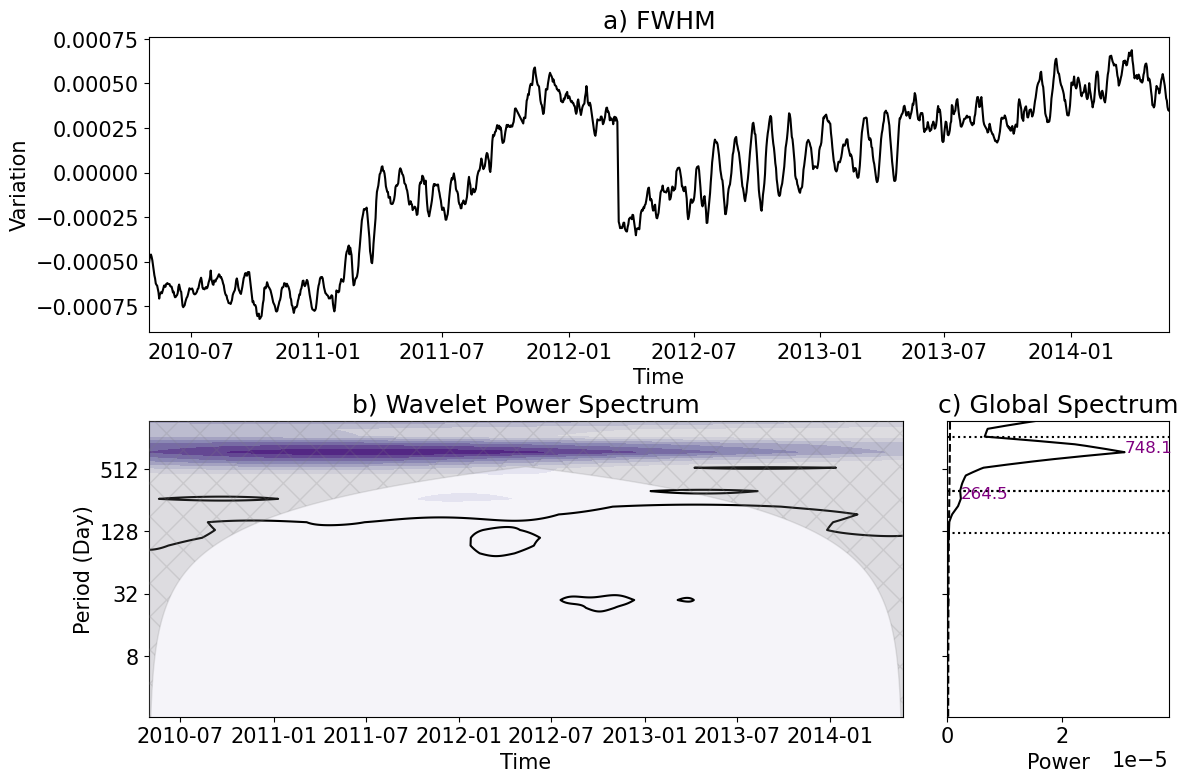

([264.4660872954987, 748.0660872954992],
 array([122.4660873, 314.4660873]),
 array([ 314.4660873, 1057.8660873]))

In [9]:
do_wavelet(sst=gaussian_fwhm_to_sigma*daily_df['median_of_stddev'].values,dt=1,
           show_peaks=True,
           time=daily_df.index,
           title='FWHM',
           ylabel='Variation',
           fig_name='eve_ops\eve_fig\eps\wavelet\wavelet_fwhm.pdf',
           unit=None) 

Data variance =  3.5531981115736326e-08


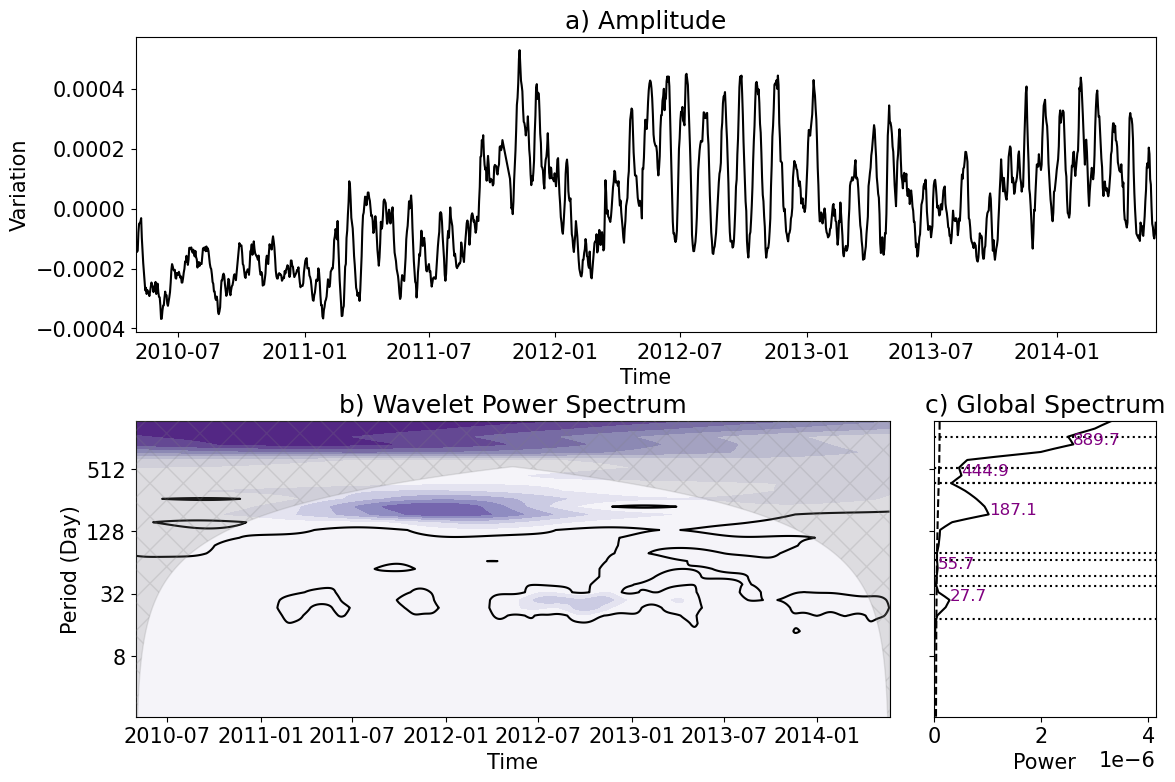

([27.66608729549853,
  55.666087295498556,
  187.06608729549868,
  444.8660872954989,
  889.6660872954993],
 array([ 18.2660873,  47.6660873,  80.0660873, 374.0660873, 528.8660873]),
 array([  37.6660873,   68.2660873,  374.0660873,  528.8660873,
        1057.8660873]))

In [8]:
do_wavelet(sst=gaussian_fwhm_to_sigma*daily_df['median_of_amplitude'].values,dt=1,
           show_peaks=True,
           time=daily_df.index,
           title='Amplitude',
           ylabel='Variation',
           fig_name='eve_ops\eve_fig\eps\wavelet\wavelet_amplitude.pdf',
           unit=None) 